<a href="https://colab.research.google.com/github/VettoriKev/Machine-Learning/blob/main/Vettori_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo practico 5
##Ejercicio 3
---
##Tasas de delitos violentos por estado de EE.UU.
Este conjunto de datos contiene estadísticas, en arrestos por cada 100,000 residentes por asalto, asesinato y violación en cada uno de los 50 estados de EE. UU. En 1973. También se da el porcentaje de la población que vive en áreas urbanas. El objetivo de este proyecto es identificar jerarquías de grupos de estados de EE. UU. Según los datos de tasas de delitos violentos. Siéntase libre de aumentar este conjunto de datos con otras fuentes [info](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html).

In [ ]:
import pandas as pd
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
df = violent_crime[['Unnamed: 0','Murder','Assault','Rape','UrbanPop']]
df.head()

,Unnamed: 0,Murder,Assault,Rape,UrbanPop
0,Alabama,13.2,236,21.2,58
1,Alaska,10.0,263,44.5,48
2,Arizona,8.1,294,31.0,80
3,Arkansas,8.8,190,19.5,50
4,California,9.0,276,40.6,91



*	**Murder**:	Arrestos por asesinato (per 100,000)
*	**Assault**:	Arrestos por asalto (per 100,000)
*	**UrbanPop**:	Porcentaje numerico de población urbana
*	**Rape**:	Numeros de arrestos por violaciones  (per 100,000)


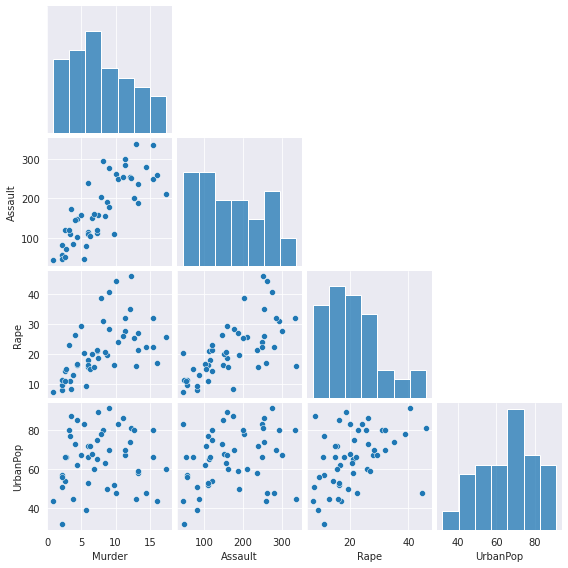

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.pairplot(df, corner=True, height=2)

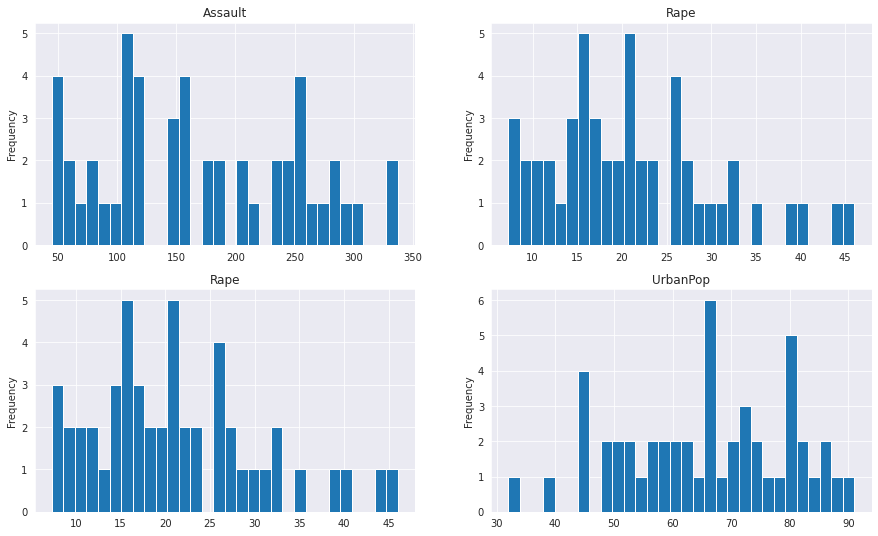

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(2, 2, figsize=(15,9))
for r,c in np.ndindex(2,2):
    df[df.columns[2+r+c]].plot.hist(bins=30, ax=axes[r,c])
    axes[r,c].set_title(df.columns[2+r+c])




---



---
### Empezamos con el clustering


In [ ]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X = s.fit_transform(df.drop(columns=['Unnamed: 0']).values)


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, init='k-means++')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Porque n = 5?
Trate de asignar un numero de cluster "intuitivo". Entonces si hablamos de taza de criminalidad y queremos dividirlo en zonas, lo primero que podemos pensar es en zonas seguras y otras que no (n_cluster=2). Pero con los datos que se tenia era predecible que no haya blancos ni negros, entonces en que gama de grises se trabajaria? Conclui que entre 3 y 5 eran numeros logicos ya que más, seria dificil para seguir a un transeunte que veria un mapa con colores de "peligrosidad".

### ¿Cómo sabemos si es efectivo el numero que elegimos?

In [ ]:
km.cluster_centers_

array([[-1.18518939, -1.22267902, -1.16102738, -1.13101714],
       [-0.70922731, -0.61406005, -0.40249141,  0.91839895],
       [ 1.59644066,  0.97606837,  0.0489325 , -0.78540457],
       [ 0.73721295,  1.13018079,  1.33477166,  0.76486721],
       [-0.1885552 , -0.27082804, -0.15713558, -0.22378414]])

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn import datasets

labels = km.labels_

# Índice de Calinski-Harabasz 

# La puntuación es más alta cuando los conglomerados son densos y 
#  están bien separados, lo que se relaciona con un concepto estándar de conglomerado.

# El índice de Calinski-Harabasz es generalmente más alto para los conglomerados convexos que otros conceptos de conglomerados.

metrics.calinski_harabasz_score(X, labels)

33.654646900084394

In [ ]:
# Indice de Davies-Bouldin 

# El índice se basa únicamente en cantidades y características inherentes al conjunto de datos, ya que su cálculo solo utiliza distancias puntuales.
# El índice de Davies-Boulding es generalmente más alto para los conglomerados convexos que para otros conceptos de conglomerados.

davies_bouldin_score(X, labels)

1.075359433718456

In [ ]:
#   El coeficiente de silueta 

# La puntuación es más alta cuando los conglomerados son densos y están bien separados, lo que se relaciona con un concepto estándar de conglomerado.

# El coeficiente de silueta es generalmente más alto para los conglomerados convexos que para otros conceptos de conglomerados.

metrics.silhouette_score(X, labels, metric='euclidean')


0.30033305641024377

In [ ]:
# Busqueda de cluster optimos 

wcss = []

for i in range(1,15):
    km=KMeans(n_clusters=i, init='k-means++', max_iter = 1000, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)


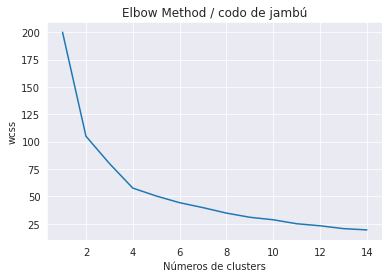

In [ ]:
plt.plot(range(1,15), wcss)
plt.title('Elbow Method / codo de jambú')
plt.xlabel('Números de clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
## Vemos el codo en 4 cluster
km = KMeans(n_clusters = 4, init='k-means++')
km.fit(X)

labels = km.labels_

mch = metrics.calinski_harabasz_score(X, labels)
mdb = davies_bouldin_score(X, labels)
ms = metrics.silhouette_score(X, labels, metric='euclidean')

print('Indice Calinski harabasz :', mch, '\n')
print('Indice Davies Bouldin :', mdb, '\n')
print('Indice Silhouette :', ms, '\n')

Indice Calinski harabasz : 37.845016785196904 

Indice Davies Bouldin : 0.9922999332310214 

Indice Silhouette : 0.3387340896430468 



In [ ]:
df[['Kmeas_clust']] = km.labels_
df.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Unnamed: 0,Murder,Assault,Rape,UrbanPop,Kmeas_clust
0,Alabama,13.2,236,21.2,58,3
1,Alaska,10.0,263,44.5,48,2
2,Arizona,8.1,294,31.0,80,2
3,Arkansas,8.8,190,19.5,50,3
4,California,9.0,276,40.6,91,2
5,Colorado,7.9,204,38.7,78,2
6,Connecticut,3.3,110,11.1,77,0
7,Delaware,5.9,238,15.8,72,0
8,Florida,15.4,335,31.9,80,2
9,Georgia,17.4,211,25.8,60,3


### Para tratar de observar la correcta clusterización, decidimos quedarnos con un modelo 3D de nuestros datos y pintar los correspondientes al mismo grupo a ver si eran identificables.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca_aux = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pca_aux, columns = ['x','y','z'])
pca_nombres = pd.concat([pca_df, df[['Kmeas_clust']]], axis=1)

pca_nombres.head(10)

,x,y,z,Kmeas_clust
0,0.985566,1.133392,-0.444269,3
1,1.950138,1.073213,2.040003,2
2,1.763164,-0.745957,0.054781,2
3,-0.141420,1.119797,0.114574,3
4,2.523980,-1.542934,0.598557,2
5,1.514563,-0.987555,1.095007,2
6,-1.358647,-1.088928,-0.643258,0
7,0.047709,-0.325359,-0.718633,0
8,3.013042,0.039229,-0.576829,2
9,1.639283,1.278942,-0.342460,3


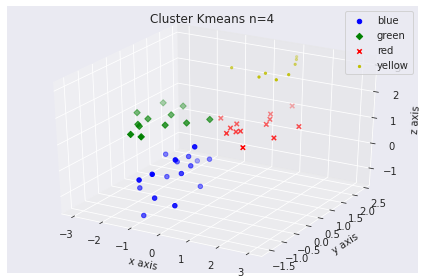

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==0,0])
y1 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==0,1])
z1 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==0,2])

x2 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==1,0])
y2 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==1,1])
z2 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==1,3])

x3 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==2,0])
y3 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==2,1])
z3 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==2,3])

x4 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==3,0])
y4 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==3,1])
z4 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==3,3])

ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')
ax.scatter(x2, y2, z2, c='g', marker='D', label='green')
ax.scatter(x3, y3, z3, c='r', marker='x', label='red')
ax.scatter(x4, y4, z4, c='y', marker='.', label='yellow')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("Cluster Kmeans n=4")
plt.legend()
plt.tight_layout()
plt.show()

### Se puede ver que si bien hay puntos de los grupos cercanos a otros, se le puede ver una cierta pertenencia a su grupo.

---



---

## Ahora probamos con otro tipo de clustering (Espectral)

In [ ]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters = 4, n_init=100)
sc.fit(X)

labels = sc.labels_

mch = metrics.calinski_harabasz_score(X, labels)
mdb = davies_bouldin_score(X, labels)
ms = metrics.silhouette_score(X, labels, metric='euclidean')

print('Indice Calinski harabasz :', mch, '\n')
print('Indice Davies Bouldin :', mdb, '\n')
print('Indice Silhouette :', ms, '\n')

Indice Calinski harabasz : 36.058935328888865 

Indice Davies Bouldin : 0.9251475496073578 

Indice Silhouette : 0.33741008812835427 



In [ ]:
df[['Sc_clust']] = sc.labels_
df.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Unnamed: 0,Murder,Assault,Rape,UrbanPop,Kmeas_clust,Sc_clust
0,Alabama,13.2,236,21.2,58,3,2
1,Alaska,10.0,263,44.5,48,2,1
2,Arizona,8.1,294,31.0,80,2,1
3,Arkansas,8.8,190,19.5,50,3,0
4,California,9.0,276,40.6,91,2,1
5,Colorado,7.9,204,38.7,78,2,1
6,Connecticut,3.3,110,11.1,77,0,0
7,Delaware,5.9,238,15.8,72,0,0
8,Florida,15.4,335,31.9,80,2,1
9,Georgia,17.4,211,25.8,60,3,2




---



---

### Ahora agregamos al clustering un nuevo atributo, siendo la suma de los crimenes para ver como nos afecta.

In [ ]:
df[['Tot_crim']] = df['Assault']+df['Murder']+df['Rape']
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Unnamed: 0,Murder,Assault,Rape,UrbanPop,Tot_crim
0,Alabama,13.2,236,21.2,58,270.4
1,Alaska,10.0,263,44.5,48,317.5
2,Arizona,8.1,294,31.0,80,333.1
3,Arkansas,8.8,190,19.5,50,218.3
4,California,9.0,276,40.6,91,325.6


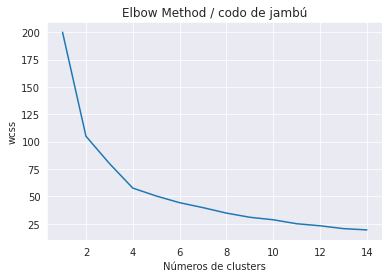

In [ ]:

wcss = []

for i in range(1,15):
    km=KMeans(n_clusters=i, init='k-means++', max_iter = 1000, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1,15), wcss)
plt.title('Elbow Method / codo de jambú')
plt.xlabel('Números de clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 4, init='k-means++')
km.fit(X)

labels = km.labels_

mch = metrics.calinski_harabasz_score(X, labels)
mdb = davies_bouldin_score(X, labels)
ms = metrics.silhouette_score(X, labels, metric='euclidean')

print('Indice Calinski harabasz :', mch, '\n')
print('Indice Davies Bouldin :', mdb, '\n')
print('Indice Silhouette :', ms, '\n')

Indice Calinski harabasz : 37.94972059900647 

Indice Davies Bouldin : 0.9969668410088918 

Indice Silhouette : 0.3396889143334439 



In [ ]:
df[['Kmeas_clust']] = km.labels_
df.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Unnamed: 0,Murder,Assault,Rape,UrbanPop,Tot_crim,Kmeas_clust
0,Alabama,13.2,236,21.2,58,270.4,3
1,Alaska,10.0,263,44.5,48,317.5,1
2,Arizona,8.1,294,31.0,80,333.1,1
3,Arkansas,8.8,190,19.5,50,218.3,3
4,California,9.0,276,40.6,91,325.6,1
5,Colorado,7.9,204,38.7,78,250.6,1
6,Connecticut,3.3,110,11.1,77,124.4,0
7,Delaware,5.9,238,15.8,72,259.7,0
8,Florida,15.4,335,31.9,80,382.3,1
9,Georgia,17.4,211,25.8,60,254.2,3


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca_aux = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pca_aux, columns = ['x','y','z'])
pca_nombres = pd.concat([pca_df, df[['Kmeas_clust']]], axis=1)

pca_nombres.head(10)

,x,y,z,Kmeas_clust
0,0.985566,1.133392,-0.444269,3
1,1.950138,1.073213,2.040003,1
2,1.763164,-0.745957,0.054781,1
3,-0.141420,1.119797,0.114574,3
4,2.523980,-1.542934,0.598557,1
5,1.514563,-0.987555,1.095007,1
6,-1.358647,-1.088928,-0.643258,0
7,0.047709,-0.325359,-0.718633,0
8,3.013042,0.039229,-0.576829,1
9,1.639283,1.278942,-0.342460,3


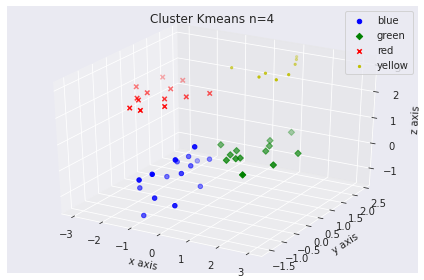

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==0,0])
y1 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==0,1])
z1 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==0,2])

x2 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==1,0])
y2 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==1,1])
z2 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==1,3])

x3 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==2,0])
y3 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==2,1])
z3 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==2,3])

x4 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==3,0])
y4 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==3,1])
z4 = np.array(pca_nombres.iloc[pca_nombres.values[:,3]==3,3])

ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')
ax.scatter(x2, y2, z2, c='g', marker='D', label='green')
ax.scatter(x3, y3, z3, c='r', marker='x', label='red')
ax.scatter(x4, y4, z4, c='y', marker='.', label='yellow')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("Cluster Kmeans n=4")
plt.legend()
plt.tight_layout()
plt.show()